# Classificateur par Régression Logistique

In [1]:
from dataset import load_dataset, preprocess
from itertools import chain
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet') 
sns.set_theme()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/binary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/binary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Chargement du jeu de données

In [2]:
dataset = load_dataset()
dataset = preprocess(dataset)
dataset.head()

,Title,Genre,Plot
6,The Great Train Robbery,western,The film opens with two bandits breaking into ...
7,The Suburbanite,comedy,The film is about a family who move to the sub...
11,From Leadville to Aspen: A Hold-Up in the Rockies,crime,The film features a train traveling through th...
14,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...
15,Laughing Gas,comedy,The plot is that of a black woman going to the...


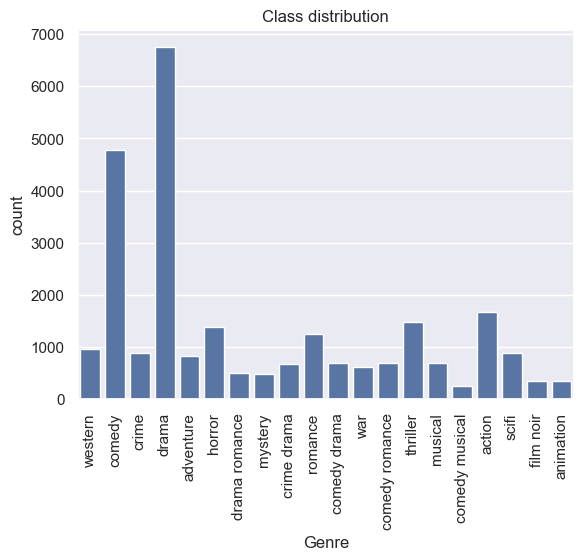

In [3]:
sns.countplot(x='Genre', data=dataset)
plt.title("Class distribution")
plt.xticks(rotation=90)
plt.show()

## Division du jeu de données

In [4]:
X, y = dataset['Plot'], dataset['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(f"Train: {len(X_train)} documents")
print(f"Test:  {len(X_test)} documents")

Train: 20931 documents
Test:  5233 documents


## Itération 1

### Entraînement du modèle

In [6]:
model = make_pipeline(
    CountVectorizer(
        lowercase=True,
        tokenizer=word_tokenize,
        token_pattern=None,
    ),
    LogisticRegression(
        class_weight='balanced',
        random_state=42,
        penalty=None,
        max_iter=1000,
    ),
)

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x13a7a6d40>)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    penalty=None, random_state=42))])

### Évaluation du modèle

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        action       0.40      0.39      0.40       328
     adventure       0.36      0.32      0.34       152
     animation       0.70      0.34      0.46        61
        comedy       0.47      0.54      0.50       973
  comedy drama       0.10      0.07      0.08       146
comedy musical       0.12      0.06      0.08        53
comedy romance       0.19      0.12      0.15       153
         crime       0.25      0.18      0.21       188
   crime drama       0.18      0.14      0.16       125
         drama       0.46      0.59      0.52      1335
 drama romance       0.15      0.12      0.14        98
     film noir       0.20      0.10      0.13        69
        horror       0.56      0.49      0.52       284
       musical       0.29      0.22      0.25       133
       mystery       0.32      0.26      0.29        89
       romance       0.26      0.21      0.23       252
         scifi       0.66      0.59      0.62  

## Itération 2

### Entraînement du modèle

In [10]:
def tokenize(document):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(document)
    return list(map(lemmatizer.lemmatize, words))

In [11]:
stop_words = stopwords.words('english')
stop_words = set(chain.from_iterable(map(tokenize, stop_words)))

In [12]:
model = make_pipeline(
    CountVectorizer(
        lowercase=True,
        tokenizer=tokenize,
        stop_words=list(stop_words),
        token_pattern=None,
    ),
    LogisticRegression(
        class_weight='balanced',
        random_state=42,
        penalty=None,
        max_iter=1000,
    ),
)

In [13]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['am', 'of', 'so', 'a', 'too', 'o',
                                             'once', "'ll", 'you', 'to',
                                             'because', 'own', 'the', 'that',
                                             'could', 'themselves', 'what',
                                             'ain', "n't", 'very', 're',
                                             'doesn', 'any', 'sha', 'doing',
                                             'up', 'don', 'can', 'after',
                                             'shouldn', ...],
                                 token_pattern=None,
                                 tokenizer=<function tokenize at 0x168dc44a0>)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    penalty=None, random_state=42))])

### Évaluation du modèle

In [14]:
y_pred = model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        action       0.40      0.41      0.40       328
     adventure       0.37      0.33      0.35       152
     animation       0.65      0.43      0.51        61
        comedy       0.47      0.53      0.49       973
  comedy drama       0.11      0.08      0.09       146
comedy musical       0.14      0.06      0.08        53
comedy romance       0.23      0.15      0.18       153
         crime       0.25      0.20      0.22       188
   crime drama       0.16      0.13      0.14       125
         drama       0.46      0.57      0.51      1335
 drama romance       0.10      0.10      0.10        98
     film noir       0.27      0.14      0.19        69
        horror       0.55      0.49      0.52       284
       musical       0.28      0.24      0.26       133
       mystery       0.32      0.29      0.31        89
       romance       0.27      0.21      0.24       252
         scifi       0.61      0.58      0.60  

## Itération 3

### Entraînement du modèle

In [16]:
model = make_pipeline(
    TfidfVectorizer(
        lowercase=True,
        tokenizer=tokenize,
        stop_words=list(stop_words),
        token_pattern=None,
    ),
    LogisticRegression(
        class_weight='balanced',
        random_state=42,
        penalty=None,
        max_iter=1000,
    ),
)

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['am', 'of', 'so', 'a', 'too', 'o',
                                             'once', "'ll", 'you', 'to',
                                             'because', 'own', 'the', 'that',
                                             'could', 'themselves', 'what',
                                             'ain', "n't", 'very', 're',
                                             'doesn', 'any', 'sha', 'doing',
                                             'up', 'don', 'can', 'after',
                                             'shouldn', ...],
                                 token_pattern=None,
                                 tokenizer=<function tokenize at 0x168dc44a0>)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    penalty=None, random_state=42))])

### Évaluation du modèle

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        action       0.35      0.38      0.37       328
     adventure       0.42      0.34      0.38       152
     animation       0.62      0.48      0.54        61
        comedy       0.49      0.58      0.53       973
  comedy drama       0.21      0.09      0.12       146
comedy musical       0.24      0.08      0.11        53
comedy romance       0.20      0.13      0.16       153
         crime       0.32      0.20      0.25       188
   crime drama       0.20      0.12      0.15       125
         drama       0.47      0.61      0.53      1335
 drama romance       0.16      0.10      0.12        98
     film noir       0.35      0.13      0.19        69
        horror       0.62      0.57      0.59       284
       musical       0.27      0.23      0.25       133
       mystery       0.45      0.28      0.34        89
       romance       0.30      0.25      0.27       252
         scifi       0.66      0.63      0.65  

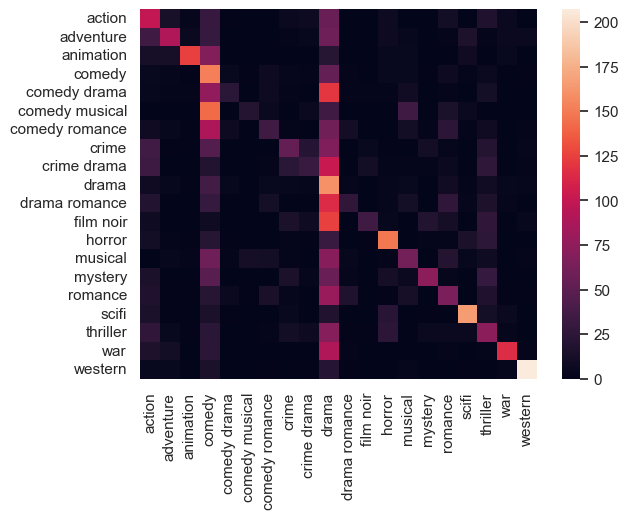

In [21]:
sample_weight = compute_sample_weight('balanced', y_test)
cm = confusion_matrix(y_test, y_pred, sample_weight=sample_weight)
sns.heatmap(cm, xticklabels=model.classes_, yticklabels=model.classes_)
plt.show()